# Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

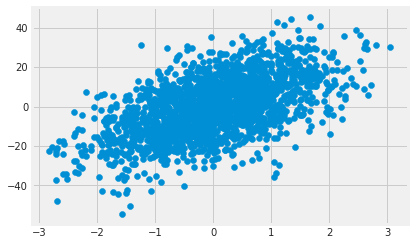

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, d = make_regression(
    n_samples=2000,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=12.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion
    random_state=12136)    #

plt.scatter(X, d);

📈 Linear Regression with Python
Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

* Linear Regression
* Ridge Regression
* LASSO Regression
* Elastic Net
* Polynomial Regression
* Artificial Neaural Networks

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns = ['x'])
df['d'] = d
df

,x,d
0,-0.075482,23.068485
1,0.254580,9.846595
2,-1.677905,-24.923331
3,0.029345,-5.869742
4,-1.260155,-20.441888
...,...,...
1995,0.837056,16.625924
1996,1.032649,3.351385
1997,-0.180803,-12.685073
1998,-0.491410,-0.425087


In [ ]:
df.describe()

,x,d
count,2000.000000,2000.000000
mean,0.014135,0.108939
std,0.985871,14.631040
min,-2.837751,-54.652680
25%,-0.626604,-9.943753
50%,0.003505,0.041820
75%,0.697471,10.020245
max,3.056231,45.498058


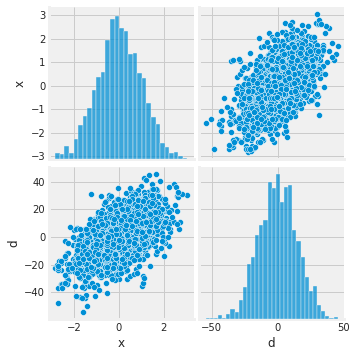

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


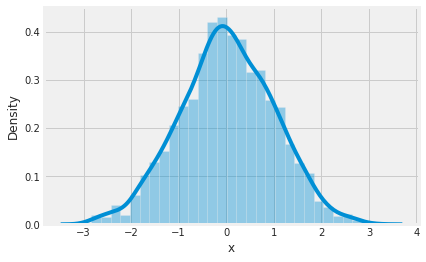

In [ ]:
sns.distplot(df['x']) # corregir

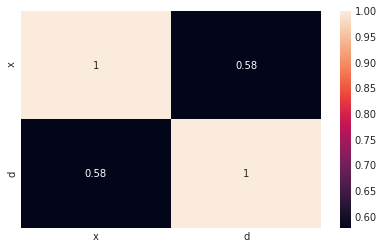

In [ ]:
sns.heatmap(df.corr(), annot=True) # corregir

# Datos de entrenamiento y prueba

In [ ]:
X = df[['x']]
y = df['d']   # corregir

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Estandarizar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Especificación
A continuación se realiza la estimación del modelo usando Python

In [ ]:
#
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.
#
from sklearn.linear_model import LinearRegression


# Crea el modelo
linearRegression = LinearRegression(
    fit_intercept=True,               # ?intercepto (w0)
    normalize=False,                  # solo para fit_intercept == False
    copy_X=True                       # copia X o lo sobreescribe
)

# Entrenamiento

In [ ]:
# Calibra el modelo
lin_reg= linearRegression.fit(X_train, y_train)

In [ ]:
# Imprime los coeficientes
print('Coeficientes: ', lin_reg.coef_)

# Imprime el intercepto
print('Intercepto: ', lin_reg.intercept_)

Coeficientes:  [8.18734467]
Intercepto:  0.2182738262453922


# Pronóstico

In [ ]:
pred = lin_reg.predict(X_test)

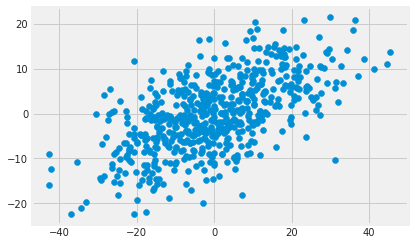

In [ ]:
plt.scatter(y_test, pred)

Residual Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


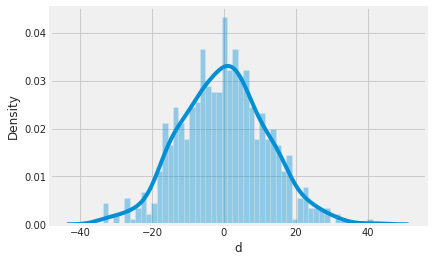

In [ ]:
sns.distplot((y_test - pred), bins=50);

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.467277835316821
MSE: 142.06694606081228
RMSE: 11.919183951127371
R2 Square 0.36103743627661145
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.49140168057479
MSE: 143.2965370684139
RMSE: 11.970653159640618
R2 Square 0.31870338859590164
__________________________________


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683


# ✔️ Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge # completar

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 9.510632929412312
MSE: 143.29766315501666
RMSE: 11.970700194851455
R2 Square 0.35550214343379627
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.521620083449578
MSE: 143.5944597918622
RMSE: 11.983090577637398
R2 Square 0.31728692909103096
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683
1,Ridge Regression,9.510633,143.297663,11.970700,0.355502,0.330684


# ✔️ LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso  # completar

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.473383154623846
MSE: 142.24828376149833
RMSE: 11.926788493198758
R2 Square 0.3602218489401986
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.49561160667695
MSE: 143.3065370684139
RMSE: 11.971070840506036
R2 Square 0.3186558440686337
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683
1,Ridge Regression,9.510633,143.297663,11.970700,0.355502,0.330684
2,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
3,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103


# ✔️ Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet# completar

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.478061755539247
MSE: 142.3873547307306
RMSE: 11.932617262391792
R2 Square 0.3595963611296693
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.498972076216758
MSE: 143.3254954859092
RMSE: 11.971862657327355
R2 Square 0.31856570716887767
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683
1,Ridge Regression,9.510633,143.297663,11.970700,0.355502,0.330684
2,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
3,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
4,Elastic Net Regression,9.478062,142.387355,11.932617,0.359596,0.283354


# ✔️ Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # completar

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.518282943444968
MSE: 143.51433566627048
RMSE: 11.979746894916874
R2 Square 0.3545276336894968
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.473904856678226
MSE: 142.4976899698906
RMSE: 11.937239629407236
R2 Square 0.32250146936176183
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683
1,Ridge Regression,9.510633,143.297663,11.970700,0.355502,0.330684
2,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
3,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
4,Elastic Net Regression,9.478062,142.387355,11.932617,0.359596,0.283354
5,Polynomail Regression,9.518283,143.514336,11.979747,0.354528,0.000000


# ✔️ Artficial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential  # completar
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
1400/1400 [==============================] - 4s 2ms/step - loss: 198.4574 - val_loss: 214.8666
Epoch 2/100
1400/1400 [==============================] - 3s 2ms/step - loss: 199.2974 - val_loss: 205.4601
Epoch 3/100
1400/1400 [==============================] - 3s 2ms/step - loss: 187.3522 - val_loss: 194.3986
Epoch 4/100
1400/1400 [==============================] - 3s 2ms/step - loss: 191.6305 - val_loss: 186.2605
Epoch 5/100
1400/1400 [==============================] - 3s 2ms/step - loss: 177.1627 - val_loss: 180.5556
Epoch 6/100
1400/1400 [==============================] - 3s 2ms/step - loss: 176.3276 - val_loss: 176.7580
Epoch 7/100
1400/1400 [==============================] - 3s 2ms/step - loss: 170.0347 - val_loss: 173.9941
Epoch 8/100
1400/1400 [==============================] - 3s 2ms/step - loss: 164.5604 - val_loss: 171.5511
Epoch 9/100
1400/1400 [==============================] - 3s 2ms/step - loss: 178.4534 - val_loss: 169.4138
Epoch 10/100
1400/1400 [=============

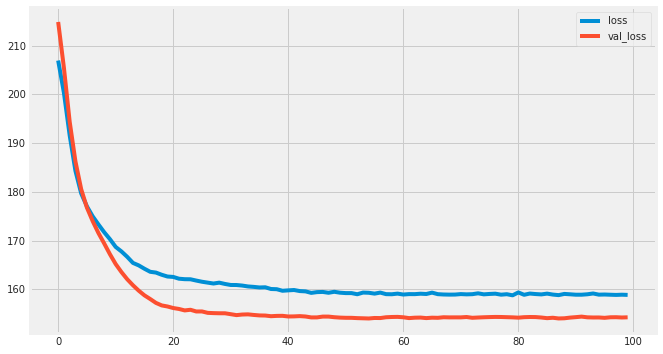

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.93225193699665
MSE: 154.25574803654845
RMSE: 12.419973753456505
R2 Square 0.30621688600026975
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.976070558576225
MSE: 158.7439634618054
RMSE: 12.599363613365773
R2 Square 0.24525933005799516
__________________________________


In [ ]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.467278,142.066946,11.919184,0.361037,0.330683
1,Ridge Regression,9.510633,143.297663,11.970700,0.355502,0.330684
2,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
3,Lasso Regression,9.473383,142.248284,11.926788,0.360222,0.326103
4,Elastic Net Regression,9.478062,142.387355,11.932617,0.359596,0.283354
5,Polynomail Regression,9.518283,143.514336,11.979747,0.354528,0.000000
6,Artficial Neural Network,9.932252,154.255748,12.419974,0.306217,0.000000


# PUEDES PROBAR CON OTROS METODOS DE REGRESION!